AlexNet
Lab Record Program 2 

In [14]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

In [15]:
#Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [16]:
#To Correctly input the data into the model
print(x_train.shape)  # (50000, 32, 32, 3)3 = Color Images
print(y_train.shape)  # (50000, 1)
print(x_test.shape)   # (10000, 32, 32, 3)
print(y_test.shape)   # (10000, 1)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [17]:
#NOrmalize the images to the range [0, 1]
x_train =  x_train / 255.0
x_test = x_test / 255.0

In [18]:
#Convert class vectors to binary class matrices (one-hot encoding)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [24]:
#Define ALexNet model in Keras
input_shape =(32,32,3)
num_classes = 10
alexnet_model = models.Sequential()

#Layer 1 : Conv Layer
alexnet_model.add(Conv2D(96,(11,11),strides=4,padding='same',input_shape=input_shape))
alexnet_model.add(layers.BatchNormalization())#Should be positioned Before the Activation Function
alexnet_model.add(layers.Activation('relu'))
alexnet_model.add(MaxPooling2D(pool_size=(2,2),strides=(1,1)))

#Layer 2: Conv Layer
alexnet_model.add(Conv2D(256,(5,5),padding='same'))
alexnet_model.add(layers.BatchNormalization())
alexnet_model.add(layers.Activation('relu'))
alexnet_model.add(MaxPooling2D(pool_size=(2,2),strides=(1,1)))

#Layer 3 : Conv Layer
alexnet_model.add(Conv2D(384,(3,3),padding='same'))
#alexnet_model.add(layers.BatchNormalization())
#alexnet_model.add(layers.Activation('relu'))
#alexnet_model.add(MaxPooling2D(pool_size=(2,2),strides=(1,1)))

#Layer 4 : Conv Layer
alexnet_model.add(Conv2D(383,(3,3),padding='same'))
#alexnet_model.add(layers.BatchNormalization())
#alexnet_model.add(layers.Activation('relu'))
#alexnet_model.add(MaxPooling2D(pool_size=(2,2),strides=(1,1)))

#Layer 5 : Conv Layer
alexnet_model.add(Conv2D(256,(3,3),padding='same'))
alexnet_model.add(layers.Activation('relu'))
alexnet_model.add(MaxPooling2D(pool_size=(2,2),strides=(1,1)))

#Fattening Layer
alexnet_model.add(Flatten())

#Layer 6: Fully Connectedd Layer

alexnet_model.add(Dense(4076))
alexnet_model.add(layers.Activation('relu'))
alexnet_model.add(layers.Dropout(0.5))

#Layer 7: Fully Connected Layer
alexnet_model.add(Dense(4096))
alexnet_model.add(layers.Activation('relu'))
alexnet_model.add(layers.Dropout(0.5))

#Layer 8 : Output Layer
alexnet_model.add(Dense(num_classes))
alexnet_model.add(layers.Activation('softmax'))
#Final Layer              

c:\Users\user\Desktop\MCA AI DS 2027\S2\Deep Learning\Lab\tfenv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
#compile the model
alexnet_model.compile(optimizer=Adam(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])

In [26]:
alexnet_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 96)       │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 96)       │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 8, 8, 96)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 7, 7, 96)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 7, 7, 256)      │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 7, 7, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 6, 6, 384)      │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 383)      │     1,324,031 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 6, 6, 256)      │       882,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4076)           │    26,090,476 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 4076)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4076)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4096)           │    16,699,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_12 (Activation)      │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │        40,970 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_13 (Activation)      │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46,573,685 (177.66 MB)

 Trainable params: 46,572,981 (177.66 MB)

 Non-trainable params: 704 (2.75 KB)

In [39]:
#--model architecture
tf.keras.utils.plot_model(alexnet_model,show_layer_names=True,show_shapes=True,show_dtype=False)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [27]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
#Create data Augmentation generator
datagen = ImageDataGenerator(
    width_shift_range = 0.1 , #randomly shift images Horizontally
    height_shift_range = 0.1, #Randomly Shift images Vertically
    horizontal_flip = True #randomly flip images Horizontally
)

In [31]:
datagen.fit(x_train)

In [32]:
#Train Model 
history = alexnet_model.fit(datagen.flow(x_train,y_train,batch_size=512),
                            epochs = 2,
                            validation_data = (x_test,y_test),
                            verbose = 1)

Epoch 1/2
98/98 ━━━━━━━━━━━━━━━━━━━━ 318s 3s/step - accuracy: 0.0999 - loss: 197290.4688 - val_accuracy: 0.1085 - val_loss: 195.4564
Epoch 2/2
98/98 ━━━━━━━━━━━━━━━━━━━━ 360s 4s/step - accuracy: 0.0976 - loss: 6.0537 - val_accuracy: 0.0963 - val_loss: 3.1604


In [34]:
#Evaluate The Model
test_loss,test_acc = alexnet_model.evaluate(x_test,y_test,verbose=2)
print(f'Test Accuracy:{test_acc}')

313/313 - 24s - 76ms/step - accuracy: 0.0963 - loss: 3.1604
Test Accuracy:0.09629999846220016


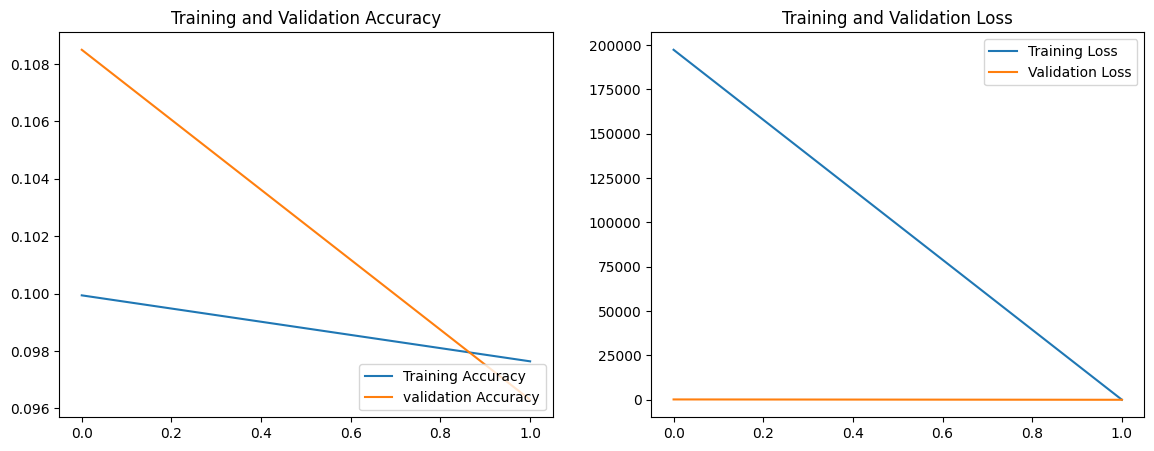

In [37]:
#plot Training and validation accuracy and loss
import matplotlib.pyplot as plt
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='validation Accuracy')
plt.legend(loc='lower right')
plt.title("Training and Validation Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.savefig('./Alexnet.png')
plt.show()
